true	fitted
______________
1.71	1.579086938037525
0.023	0.6050444306635336
0.15	1.2349261269604521
3.4	1.2854246121710124
0	-1.0381366862339807
0	2.2873574616912045
0	-0.698611359421584
0	-0.4595589443382125


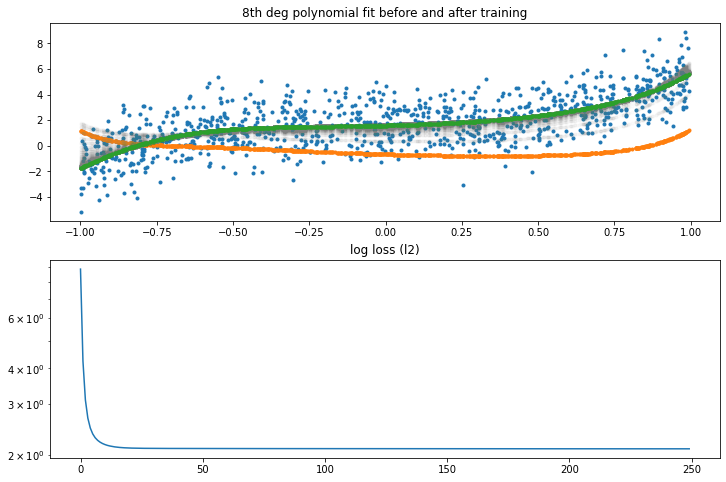

In [6]:
import numpy as np
import matplotlib.pyplot as plt



def memoize(fun):
    
    memory = dict()
    
    def wrapperfun(*args):
        k = tuple(args[1])
        if k in memory:
            return memory[k]
        else:
            memory[k] = fun(*args)
            return memory[k]
        
    return wrapperfun



class Polynomial(object):
    
    def __init__(self,degree):
        
        self.degree = degree
        self.coefs = np.random.randn(self.degree+1)
        self.loss_log = []
        
    @memoize
    def powers(self,x):
        return np.vstack([x**i for i in range(self.degree+1)])

    def predict(self,x):
        return np.dot(self.coefs,self.powers(x))

    def l2loss(self,x,y):
        return np.mean((self.predict(x)-y)**2)
    
    def gradient(self,x,y):
        return 2*np.mean((self.predict(x)-y)*self.powers(x),axis=1)
    
    def descend(self,x,y,learning_rate=0.1):
        self.loss_log.append(self.l2loss(x,y))
        self.coefs = self.coefs - learning_rate*self.gradient(x,y)
        return None
    
    

    
# make data  
a = 1.71
b = 0.023
c = 0.15
d = 3.4
sig = 1.5

x = np.random.uniform(-1,1,1000)
y = a + b*x + c*x**2 + d*x**3 + sig*np.random.randn(*x.shape)
    
# initiate model    
np.random.seed = 45
model = Polynomial(8)


ax1,ax2 = plt.subplots(2,figsize=(12,8))[1]
ax1.plot(x,y,'.')
ax1.plot(x,model.predict(x),'.')

for i in range(250):
    model.descend(x,y,learning_rate=0.25)
    ax1.plot(x,model.predict(x),'.',alpha=0.025,color='gray')
    
ax1.plot(x,model.predict(x),'.')
ax1.set_title('%ith deg polynomial fit before and after training' % model.degree)

ax2.semilogy(model.loss_log)
ax2.set_title('log loss (l2)')

print('true\tfitted\n______________')
for i,j in zip([a,b,c,d,0,0,0,0],model.coefs):
    print(i,end='\t')
    print(j)

true	fitted
______________
1.71	1.5684078472998653
0.023	0.2422449323363258
0.15	-0.08258425938234613
3.4	2.9652023723670933
0	1.1223863945161248
0	-0.0005883945373225635
0	-0.08618575131740591
0	0.32235155359304685


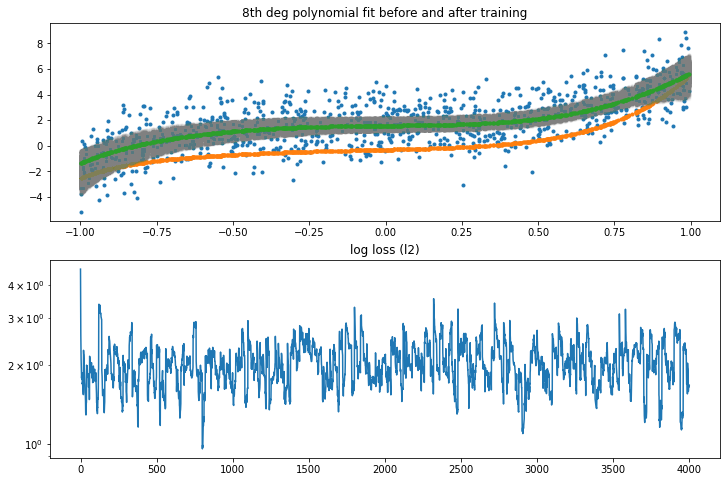

In [13]:
def minibatches(x,y,size=100):
    
    index = np.array(range(len(x)))
    np.random.shuffle(index)
    
    for i in range(int(len(x)/size)):
        subset = index[i:i+size] 
        yield x[subset],y[subset]
        
        
np.random.seed = 45
model = Polynomial(8)       

ax1,ax2 = plt.subplots(2,figsize=(12,8))[1]
ax1.plot(x,y,'.')
ax1.plot(x,model.predict(x),'.')
        
for epoch in range(200):
    for x_,y_ in minibatches(x,y,size=50):
        model.descend(x_,y_,learning_rate=0.125)
        if epoch > 100:
            ax1.plot(x,model.predict(x),'.',alpha=0.025,color='gray')

        
ax1.plot(x,model.predict(x),'.')
ax1.set_title('%ith deg polynomial fit before and after training' % model.degree)

ax2.semilogy(model.loss_log)
ax2.set_title('log loss (l2)')

print('true\tfitted\n______________')
for i,j in zip([a,b,c,d,0,0,0,0],model.coefs):
    print(i,end='\t')
    print(j)

Minibatching introduces stochastic noise that can be used as a natural protection against overfitting, because, rather than to converge to a local minimum, it allows for an exploration of the function space that corresponds to the noise on the data. This is similiar, in spirit, to bootstrapping, except that the parameters of the learning process also play a role. 

I need to dig up the paper that actually uses this effect to essentially merge deep learning and markov chain monte carlo estimation to explore the posterior of the model. 